                                    Welcome to Machine Learning Challenge!

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [75]:
import pdb

In [108]:
input_path = "/home/ankur/MachineLearning/challenge/ml-Challenge/data/ml1data.train.txt"
output_path = "/home/ankur/MachineLearning/challenge/ml-Challenge/data/challengeDataset.csv"

In [81]:
dataset = pd.read_csv(input_path)
print(dataset)

     A   138  E  35.91  J    7.79  P  AA  88  AF  ...   CQ  177.27  NK  DF  \
0    A   966  E  35.91  V   22.63  Q  AD  88  AF  ...   DC  171.97  NK  DF   
1    C   345  E  35.91  J   12.19  Q  AA  88  AF  ...   DC  121.70  NK  DF   
2    B   276  F  35.91  O    5.61  T  AC  44  BA  ...   CQ   60.85  NK  DG   
3    C   552  G  35.91  L   27.67  T  AB  44  AF  ...   DA   92.60  NK  DF   
4    B   161  F  35.91  J   17.17  Q  AB  44  AF  ...   CQ   92.60  NK  DF   
5    A   345  H  71.81  M    6.33  Q  AA  88  AF  ...   DC   87.31  NK  DG   
6    B   460  F  35.91  N   43.12  P  AD  22  AG  ...   CQ  158.75  NK  DF   
7    C   414  E  35.91  N   25.67  Q  AC  66  AF  ...   DC   71.44  NK  DF   
8    B  1242  H  35.91  O  106.30  Q  AE  66  AF  ...   DB  153.45  NK  DG   
9    C   483  F  35.91  O   10.48  S  AA  88  BA  ...   CQ   95.25  DE  DF   
10   B   138  F  35.91  J    3.93  Q  AE  66  BF  ...   CQ   68.79  NK  DF   
11   C   276  F  35.91  L   10.49  Q  AB  88  AF  ...   CQ  132.

In [93]:
headers = ["X1", "X2", "X3", "X4", "X5",
               "X6", "X7", "X8", "X9", "X10",
               "X11","X12","X13","X14", "X15", "X16", "X17", "X18",
               "X19", "X20", "X21","Y"]

In [107]:
dataset.columns = headers
print(dataset)

    X1    X2 X3     X4 X5      X6 X7  X8  X9 X10  ...  X13     X14 X15  X16  \
0    A   966  E  35.91  V   22.63  Q  AD  88  AF  ...   DC  171.97  NK   DF   
1    C   345  E  35.91  J   12.19  Q  AA  88  AF  ...   DC  121.70  NK   DF   
2    B   276  F  35.91  O    5.61  T  AC  44  BA  ...   CQ   60.85  NK   DG   
3    C   552  G  35.91  L   27.67  T  AB  44  AF  ...   DA   92.60  NK   DF   
4    B   161  F  35.91  J   17.17  Q  AB  44  AF  ...   CQ   92.60  NK   DF   
5    A   345  H  71.81  M    6.33  Q  AA  88  AF  ...   DC   87.31  NK   DG   
6    B   460  F  35.91  N   43.12  P  AD  22  AG  ...   CQ  158.75  NK   DF   
7    C   414  E  35.91  N   25.67  Q  AC  66  AF  ...   DC   71.44  NK   DF   
8    B  1242  H  35.91  O  106.30  Q  AE  66  AF  ...   DB  153.45  NK   DG   
9    C   483  F  35.91  O   10.48  S  AA  88  BA  ...   CQ   95.25  DE   DF   
10   B   138  F  35.91  J    3.93  Q  AE  66  BF  ...   CQ   68.79  NK   DF   
11   C   276  F  35.91  L   10.49  Q  AB  88  AF  ..

In [110]:
dataset.to_csv(output_path, index=False)
print(dataset.describe())

                X2          X4          X6          X9         X12  \
count   502.000000  502.000000  502.000000  502.000000  502.000000   
mean    475.211155   41.273546   21.807888   65.956175   45.131474   
std     283.880178   12.810565   18.927118   23.934835   17.652971   
min      92.000000   35.910000    1.670000   22.000000   16.000000   
25%     276.000000   35.910000    9.070000   44.000000   32.000000   
50%     414.000000   35.910000   15.465000   66.000000   48.000000   
75%     552.000000   35.910000   26.507500   88.000000   64.000000   
max    1380.000000   71.810000  106.300000   88.000000   64.000000   

              X14            X17         X19  
count  502.000000     502.000000  502.000000  
mean    94.878406   74988.950199   82.538586  
std     30.228991   30537.163623   25.624699  
min     52.920000   54321.000000   71.810000  
25%     71.440000   54321.000000   71.810000  
50%     89.960000   54321.000000   71.810000  
75%    108.480000  108642.000000   71.81

In [111]:
def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """

    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],
                                                        train_size=train_percentage)
    return train_x, test_x, train_y, test_y

In [103]:
print(headers[0:])

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'Y']


In [121]:
train_x, test_x, train_y, test_y = split_dataset(dataset, 0.7, headers[0:-1], headers[21])

/home/ankur/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [119]:
print ("Train_x Shape :: ", train_x.shape)
print(train_x)

Train_x Shape ::  (351, 21)
    X1    X2 X3     X4 X5     X6 X7  X8  X9 X10 ... X12  X13     X14  X15 X16  \
48   C   552  G  35.91  N  31.19  Q  AC  66  AF ...  48   DC   92.60   NK  DF   
380  B  1104  G  35.91  X  50.55  T  AD  44  AF ...  64   DB   82.02   NK  DS   
482  B  1104  E  35.91  L  33.97  Q  AB  44  BA ...  48   DC   79.37   NK  DF   
320  B   828  F  35.91  J  17.81  T  AB  88  BA ...  64   DB  132.29   NK  DS   
378  C   138  F  35.91  M   4.48  Q  AD  22  BA ...  64   CQ  142.87   NK  DF   
446  C   552  F  35.91  N  17.80  Q  AA  88  AF ...  64   DC   92.60   NK  DF   
146  B   414  F  35.91  O  12.75  S  AE  66  BF ...  48   CQ   95.25   DE  DF   
379  A   828  F  35.91  M  61.81  Q  AC  44  AF ...  16   DC   63.50   NK  DF   
235  B   276  F  35.91  J   7.28  Q  AB  88  BA ...  64   CQ  129.64   NK  DF   
483  D   230  F  71.81  M   8.27  T  AA  22  BA ...  64   DB  127.00   NK  DS   
7    C   414  E  35.91  N  25.67  Q  AC  66  AF ...  16   DC   71.44   NK  DF   


In [123]:
    print ("Train_y Shape :: ", train_y.shape)
    print(train_y)
    print ("Test_x Shape :: ", test_x.shape)
    print ("Test_y Shape :: ", test_y.shape)

Train_y Shape ::  (351,)
48      MEM
57      MEM
26      MEM
71      MEM
102     MEM
184     MEM
134    NMEM
498     MEM
147    NMEM
248     MEM
178     MEM
439     MEM
119    NMEM
446     MEM
399     MEM
283     MEM
295     MEM
176     MEM
23     NMEM
364    NMEM
54      MEM
133     MEM
281    NMEM
406     MEM
218     MEM
323     MEM
400     MEM
237     MEM
320    NMEM
309     MEM
       ... 
82     NMEM
88     NMEM
211    NMEM
496     MEM
357     MEM
491    NMEM
65      MEM
179     MEM
249     MEM
45      MEM
405     MEM
459     MEM
144     MEM
37     NMEM
306    NMEM
253     MEM
53      MEM
159    NMEM
279    NMEM
359    NMEM
293     MEM
425     MEM
174     MEM
122    NMEM
458    NMEM
432     MEM
476     MEM
469    NMEM
481     MEM
325    NMEM
Name: Y, Length: 351, dtype: object
Test_x Shape ::  (151, 21)
Test_y Shape ::  (151,)


In [127]:
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf

In [128]:
 # Create random forest classifier instance
trained_model = random_forest_classifier(train_x, train_y)
print ("Trained model :: ", trained_model)
predictions = trained_model.predict(test_x)

for i in xrange(0, 5):
    print ("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i]))

print ("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
print ("Test Accuracy  :: ", accuracy_score(test_y, predictions))
print ("Confusion matrix ", confusion_matrix(test_y, predictions))


ValueError: could not convert string to float: 'DO'

In [77]:
# Read data

# data = np.loadtxt("C:\\Users\\Varma\\ML Challenge\\data\\ml1data.train.txt")
##with open('C:\\Users\\Varma\\ML Challenge\\data\\ml1data.train.txt', 'r') as f:
with open(input_path,'r') as f:
        data = [i.split(",") for i in f.read().split()]
        print(data)
        

[['A', '138', 'E', '35.91', 'J', '7.79', 'P', 'AA', '88', 'AF', 'NP', '64', 'CQ', '177.27', 'NK', 'DF', '108642', 'DM', '71.81', 'DP', 'DO', 'MEM'], ['A', '966', 'E', '35.91', 'V', '22.63', 'Q', 'AD', '88', 'AF', 'CCA', '64', 'DC', '171.97', 'NK', 'DF', '108642', 'DJ', '71.81', 'NN', 'DO', 'MEM'], ['C', '345', 'E', '35.91', 'J', '12.19', 'Q', 'AA', '88', 'AF', 'NP', '64', 'DC', '121.7', 'NK', 'DF', '108642', 'DM', '71.81', 'DP', 'DO', 'MEM'], ['B', '276', 'F', '35.91', 'O', '5.61', 'T', 'AC', '44', 'BA', 'NP', '64', 'CQ', '60.85', 'NK', 'DG', '54321', 'DH', '71.81', 'NN', 'DO', 'MEM'], ['C', '552', 'G', '35.91', 'L', '27.67', 'T', 'AB', '44', 'AF', 'NP', '48', 'DA', '92.6', 'NK', 'DF', '108642', 'DM', '71.81', 'NN', 'DO', 'MEM'], ['B', '161', 'F', '35.91', 'J', '17.17', 'Q', 'AB', '44', 'AF', 'GA', '32', 'CQ', '92.6', 'NK', 'DF', '54321', 'DM', '71.81', 'NN', 'DO', 'MEM'], ['A', '345', 'H', '71.81', 'M', '6.33', 'Q', 'AA', '88', 'AF', 'NP', '48', 'DC', '87.31', 'NK', 'DG', '108642', 'D

In [3]:
np.genfromtxt('C:\\Users\\Varma\\ML Challenge\\data\\ml1data.train.txt', delimiter=',')

array([[  nan,  138.,   nan, ...,   nan,   nan,   nan],
       [  nan,  966.,   nan, ...,   nan,   nan,   nan],
       [  nan,  345.,   nan, ...,   nan,   nan,   nan],
       ..., 
       [  nan,  276.,   nan, ...,   nan,   nan,   nan],
       [  nan,  276.,   nan, ...,   nan,   nan,   nan],
       [  nan,  414.,   nan, ...,   nan,   nan,   nan]])

In [9]:
help(data)

Help on list object:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /

In [43]:
labels = []
for i in range(503):
    labels.append(data[i][21])

In [46]:
print(len(labels))

503


In [55]:
x_data = []
for i in range(503):
    for j in range(21):
        x_data.append(data[i][j])

In [61]:
input_data = np.array(x_data).reshape(503,21)

In [72]:
print(input_data[0])

['A' '138' 'E' '35.91' 'J' '7.79' 'P' 'AA' '88' 'AF' 'NP' '64' 'CQ'
 '177.27' 'NK' 'DF' '108642' 'DM' '71.81' 'DP' 'DO']


In [69]:
import matplotlib.pyplot as plot

In [70]:
plot.plot(input_data)

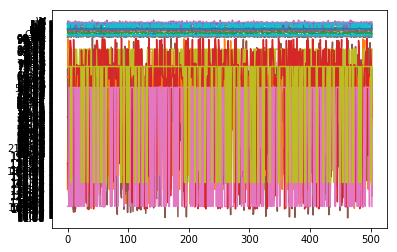

In [71]:
plot.show()